# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/i/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


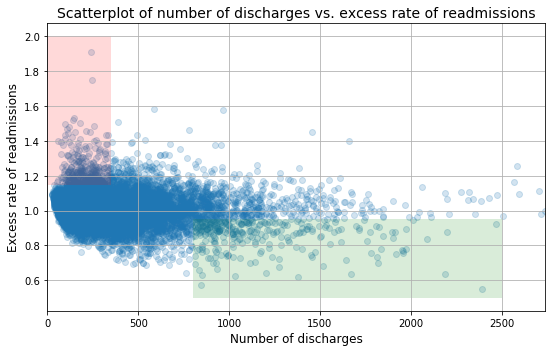

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [6]:
import seaborn as sns
import scipy.stats as stats
import math

import folium # For Chloropleth
import os

In [7]:
# Functions from DataCamp course:

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y



## Construct DataFrames

In [8]:
df = clean_hospital_read_df[81:-3] # Remove zero and outlier Number of Discharges

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 1832 to 6643
Data columns (total 12 columns):
Hospital Name                 11494 non-null object
Provider Number               11494 non-null int64
State                         11494 non-null object
Measure Name                  11494 non-null object
Number of Discharges          11494 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11494 non-null float64
Predicted Readmission Rate    11494 non-null float64
Expected Readmission Rate     11494 non-null float64
Number of Readmissions        11494 non-null float64
Start Date                    11494 non-null object
End Date                      11494 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [10]:
df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11494.000000,11494.000000,0.0,11494.000000,11494.000000,11494.000000,11494.000000
mean,257582.184792,364.313729,NaN,1.007541,17.986193,17.867522,63.539064
std,154285.620670,299.546395,NaN,0.091912,5.484839,5.238526,59.027926
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,159.250000,NaN,0.952700,16.300000,16.600000,24.000000
50%,250042.000000,281.000000,NaN,1.003550,19.050000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058075,21.500000,21.400000,82.000000
max,670082.000000,2740.000000,NaN,1.909500,32.800000,28.000000,623.000000


# df.head()

In [11]:
cols = df.columns
pd.Series(cols)

0                  Hospital Name
1                Provider Number
2                          State
3                   Measure Name
4           Number of Discharges
5                       Footnote
6       Excess Readmission Ratio
7     Predicted Readmission Rate
8      Expected Readmission Rate
9         Number of Readmissions
10                    Start Date
11                      End Date
dtype: object

In [12]:
# Give some column names aliases
discharges = cols[4]
excess = cols[6]
predicted = cols[7]
expected = cols[8]
readmissions = cols[9]

In [13]:
# Remove Hospital Name, Provider Number, Footnote columns
cols_light = cols.delete([0, 1, 5])
df_light = df[cols_light]
df_light.head()

,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [14]:
# Numerical columns only
cols_num = cols.delete([0, 1, 2, 3, 5, 10, 11])
df_num = df[cols_num]
df_num.head()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
1832,25,1.0914,26.8,24.6,12.0
1699,27,1.0961,24.8,22.6,12.0
1774,28,1.0934,24.4,22.3,12.0
1853,29,1.0908,21.0,19.3,11.0
1290,30,1.1123,23.2,20.9,13.0


# Revised Report

## A. Comment on Prior Report's Qualitative Initial Observations

* The initial report is correct in that the rate of readmissions trends down as the Number of Discharges (NoD) increases.  However, this fact is not so clear from the plot in the initial report.
  * The red and green shaded areas are slightly misleading given the context of the report's claims. The regions with a low NoD or a high number of discharges extend vertically indefinitely. The claims in the report that "With lower number of discharges, there is a greater incidence of excess rate of readmissions" and "With higher number of discharges, there is a greater incidence of lower rates of readmissions" actually refer to these unbounded regions.
  * Furthermore, a trendline would perhaps make the point a bit more clearly. Such a plot is included below.

* [While the effect is definite, it is not large. To achieve a reduction in Excess Readmission Ratio of one percentage point (0.01), the hospital size (measured by NoD), would have to increase by 350.](#Examination-of-Prior-Report's-Qualitative-Initial-Observations) This has implications for [Policy Recommendations](#D.-Regulatory-Policy-Recommendations).
 

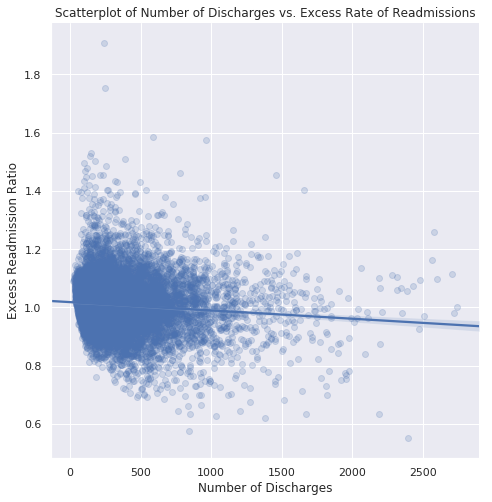

In [15]:
sns.set(style="darkgrid")
_ = sns.lmplot(x=discharges, y=excess, data=df_num,
                height=7, ci=95, scatter_kws={'alpha':0.2})
_ = plt.title('Scatterplot of Number of Discharges vs. Excess Rate of Readmissions')

## B. Statistics

* [The statistics given in the initial report are correct though their practical significance is questionable.](#LNOD-vs-SNOD) In addition, the variation in Excess Readmission Ratio of the hospitals/facilities with a Large (> 1000) Number of Discharges (LNOD) is much greater than the variation in Excess Readmission Ratio of the hospitals/facilities with a Small (< 100) Number of Discharges (SNOD).
* [Further analysis shows that there are distinct clusters of hospitals/facilities.](#Clusters%3A-HERR-vs-LERR%3B-Large-vs-Small-LERR%3B-By-Procedure) [The most distinct cluster consists of facilities which perform Elective Primary Total Hip Arthroplasty and/or Total Knee Arthroplasty (THA/TKA) while the other clusters consist of facilities which perform the other four procedures.](#HERR-vs-LERR%3A-Qualitative) THA/TKA facilities are characterized by having a Low (≤ 7.8) Expected Readmission Rate (LERR) while the other facilities have a High (≥ 12.3) Expected Readmission Rate (HERR). In addition, the THA/TKA facilities exhibit the greatest correlation between size (NoD) and Excess Readmission Ratio, as well as greater variation in Excess Readmission Ratio.
  * [The correlation between Excess Readmission Ratio and size (NoD of THA/TKA facilities is $r = -0.36$. The slope of the best fit line is -0.0001528, which means that for every increase of 64 in size (NoD) one expects a decrease in Excess Readmission Ratio by 0.01.](#HERR-vs-LERR%3A-Quantitative)
  * [26.95% of Large (> 1000 NoD) THA/TKA facilities have an Excess Readmission Ratio > 1 while **99.38% of Small (< 200 NoD) THA/TKA facilities have an Excess Readmission Ratio > 1**.](#LERR-LNOD-vs-LERR-SNOD)
  * [Of the 500 facilities with the greatest Excess Readmission Ratios, 275 (55%) are THA/TKA facilities (LERR) and other 225 (45%) treat the other conditions (HERR).](#A-Brief-Exploration-of-High-vs-Low-Excess-Readmission-Ratio-Facilities)
* [There may be some geographic variation in Excess Readmission Ratio, with the northern Mountain region having lower Excess Readmission Ratio and the Northeastern region, excluding ME, NH, and VT, having greater Excess Readmission Ratio.](#Excess-Readmission-Ratio-by-State)

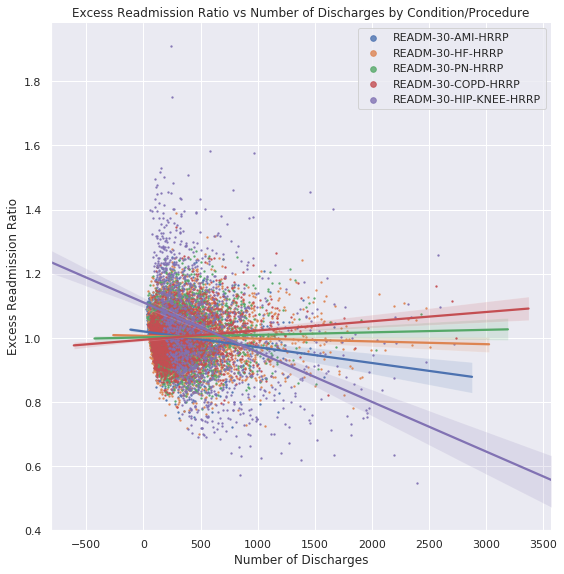

In [16]:
sns.set(style="darkgrid")
g = sns.lmplot(x=discharges, y=excess, data=df_light, legend_out=False,
               height=8, scatter_kws={'s':2}, hue='Measure Name')
# replace labels wtih measure_conds dict map… further explore matplotlib.axes.legend
#leg = g.ax.get_legend()
#g.ax.legend(measure_conds.values())
#new_labels = measure_conds.values()
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

_ = plt.title('Excess Readmission Ratio vs Number of Discharges by Condition/Procedure')
_ = plt.legend(markerscale=4)

The Measure Names correspond to the following procedures or conditions:
* 'READM-30-AMI-HRRP': Acute Myocardial Infarction (AMI)
* 'READM-30-HF-HRRP': Heart Failure (HF)
* 'READM-30-PN-HRRP': Pneumonia (PN)
* 'READM-30-COPD-HRRP': Chronic Obstructive Pulmonary Disease (COPD)
* 'READM-30-HIP-KNEE-HRRP': Elective Primary Total Hip Arthroplasty and/or Total Knee Arthroplasty (THA/TKA)

[Plots of each Measure Name on separate axes are available in the Methods for this section](#Further-Exploration-by-Procedure%2FCondition).

## C. Conclusions

* For all facilities, there is a small correlation between Excess Readmission Ratio and facility size (NoD). We can expect that increasing facility size (NoD) by 350 would have the effect of decreasing Excess Readmission Ratio by 0.01. Much of this effect is due to facilities which perform THA/TKA procedures.
* For facilities which perform THA/TKA procedures, there is a more considerable correlation between Excess Readmission Ratio and facility size (NoD). We can expect that increasing facility size (NoD) by 64 would have the effect of decreasing Excess Readmission Ratio by 0.01.
* Smaller facilities which perform THA/TKA may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
* A majority (55%) of the 500 facilities which have the greatest Excess Readmission Ratio perform THA/TKA, despite the fact that there are only 1369 facilities in total which perform THA/TKA (out of 11494 total facilities).
* There is a small correlation between Excess Readmission Ratio and facility size (NoD) for AMI and COPD as well. The effect size may not justify action, though this is worthy of further study.
* There may be a correlation between Excess Readmission Ratio and State. This is worthy of further study.

## D. Regulatory Policy Recommendations

* Facilties with small capacity (< 300) **which perform THA/TKA** should be required to demonstrate upgraded resource allocation for quality care to continue operation.
* Pending the outcome of a cost-benefit analysis that weighs the benefits of a reduced Excess Readmissions Ratio with possible costs of consolidation, directives and incentives should be provided for consolidation of facilities **which perform THA/TKA** to have a smaller number of them with higher capacity and number of discharges.
* Commission further studies to explore
  * a cost-benefit analysis for consolidation of facilities which perform THA/TKA,
  * the relationship between Excess Readmission Ratio and facility size for AMI and COPD and potential costs/benefits of consolidation for facilities treating these conditions, and
  * the relationship between geography and Excess Readmission Ratio.



## E. Methods

In [17]:
measures = df_light['Measure Name'].unique()
print('List of measures:', measures)

List of measures: ['READM-30-AMI-HRRP' 'READM-30-HF-HRRP' 'READM-30-PN-HRRP'
 'READM-30-COPD-HRRP' 'READM-30-HIP-KNEE-HRRP']


In [18]:
measure_conds = dict(zip(measures, ['AMI', 'HF', 'PN', 'COPD', 'THA/TKA']))

### Examination of Prior Report's Qualitative Initial Observations

A Seaborn jointplot with the linear regression trendline shown as well as a Kernel Density Estimate (KDE) of the distributions of NoD and Excess Readmission Ratio shows that, while Excess Readmissions Ratio is normal-looking, NoD is right skew.

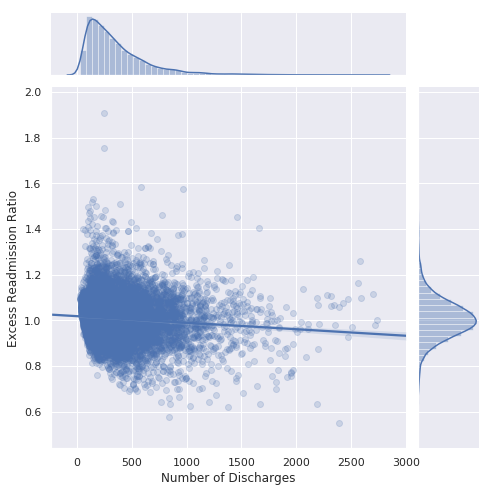

In [19]:
sns.set(style="darkgrid")
_ = sns.jointplot(x=discharges, y=excess, data=df_num, kind='reg',
                height=7, scatter_kws={'alpha':0.2})

Below we quantify the relationship between NoD and Excess Readmission Ratio. Note that the Excess Readmission Ratio is normally distributed.

In [20]:
# The Excess Readmission Ratio is normally distributed, but,
# strictly speaking, Number of Discharges is not normal. Compute r anyway…
(r, p) = stats.pearsonr(df_num[discharges], df_num[excess])
print('The Pearson correlation coefficient is r = %.2f.\n\
The probability of uncorrelated sets producing an r-value at least as extreme is p = %.5f.' % (r, p))

(m, b) = np.polyfit(df_num[discharges], df_num[excess], 1)
print('The slope is %.7f and the intercept is %.3f.' % (m,b))

print('Along the line of best fit, an increase by %i in the ' % ((-0.01) / m) + discharges \
      + ' results \nin a decrease in ' + excess + ' of 0.01.' )

The Pearson correlation coefficient is r = -0.09.
The probability of uncorrelated sets producing an r-value at least as extreme is p = 0.00000.
The slope is -0.0000286 and the intercept is 1.018.
Along the line of best fit, an increase by 350 in the Number of Discharges results 
in a decrease in Excess Readmission Ratio of 0.01.


### LNOD vs SNOD

Below we verify that for the Excess Readmission Ratio of the two samples, LNOD and SNOD,
$$\mu_\text{LNOD} = 0.979 \quad \text{ and } \quad \mu_\text{SNOD} = 1.023.$$
Also note
$$\sigma_\text{LNOD} = 0.119 \quad \text{ and } \quad \sigma_\text{SNOD} = 0.0580;$$ $$n_\text{LNOD} = 460 \quad \text{ and } \quad n_\text{SNOD} = 1188.$$
45% of LNOD has Excess Readmission Rate greater than 1; 63% of SNOD has Excess Readmission Rate greater than 1.

In [21]:
df_lnod = df_num[df_num[discharges] > 1000]
df_lnod.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,460.000000,460.000000,460.000000,460.000000,460.000000
mean,1361.269565,0.979073,16.096522,16.140870,214.821739
std,350.438731,0.119358,8.118852,7.697366,125.246523
min,1002.000000,0.549500,2.700000,4.100000,23.000000
25%,1107.000000,0.909025,5.500000,5.300000,86.750000
50%,1241.000000,0.986700,19.200000,19.550000,228.500000
75%,1508.000000,1.057100,22.625000,22.500000,288.750000
max,2740.000000,1.454300,31.000000,25.700000,623.000000


In [22]:
df_snod = df_num[df_num[discharges] < 100]
df_snod.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,74.717172,1.022618,20.033923,19.631987,15.930135
std,16.908819,0.057979,3.021217,2.865923,4.282485
min,25.000000,0.893500,7.200000,5.300000,11.000000
25%,62.000000,0.984900,18.000000,17.975000,12.750000
50%,77.000000,1.017750,20.050000,19.800000,15.000000
75%,89.000000,1.052925,22.000000,21.500000,18.000000
max,99.000000,1.495300,30.000000,28.000000,34.000000


In [23]:
mu_lnod, mu_snod = df_lnod[excess].mean(), df_snod[excess].mean()
print('The mean ' + excess + ' for LNOD is %.3f.\n' % mu_lnod + 
'The mean ' + excess + ' for SNOD is %.3f.' %  mu_snod)

sigma_lnod, sigma_snod = df_lnod[excess].std(), df_snod[excess].std()
print('The standard deviation in ' + excess + ' for LNOD is %.3f.\n' % sigma_lnod + 
'The standard deviation in ' + excess + ' for SNOD is %.3f.' %  sigma_snod)

print('The size of LNOD is %i.\n' % len(df_lnod) + 
'The size of SNOD is %i.' %  len(df_snod))

print('{:.2%} of LNOD has an Excess Readmission Ratio > 1.'\
      .format(len(df_lnod[df_lnod[excess] > 1]) / len(df_lnod)))
print('{:.2%} of SNOD has an Excess Readmission Ratio > 1.'\
      .format(len(df_snod[df_snod[excess] > 1]) / len(df_snod)))

The mean Excess Readmission Ratio for LNOD is 0.979.
The mean Excess Readmission Ratio for SNOD is 1.023.
The standard deviation in Excess Readmission Ratio for LNOD is 0.119.
The standard deviation in Excess Readmission Ratio for SNOD is 0.058.
The size of LNOD is 460.
The size of SNOD is 1188.
44.57% of LNOD has an Excess Readmission Ratio > 1.
63.22% of SNOD has an Excess Readmission Ratio > 1.


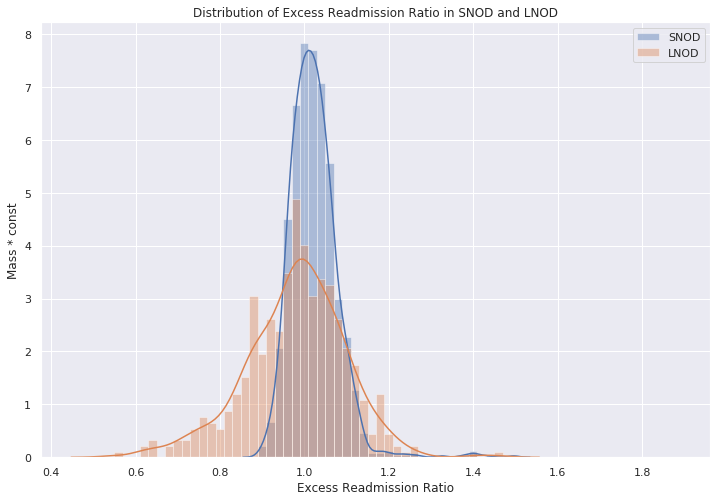

In [24]:
bins_excess = np.arange(df_num[excess].min(), df_num[excess].max(), 0.02)
_ = plt.figure(figsize=(12,8))
_ = sns.distplot(df_snod[excess], bins=bins_excess, label='SNOD')
_ = sns.distplot(df_lnod[excess], bins=bins_excess, label='LNOD')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Mass * const')
_ = plt.title('Distribution of Excess Readmission Ratio in SNOD and LNOD')
_ = plt.legend()
plt.show()

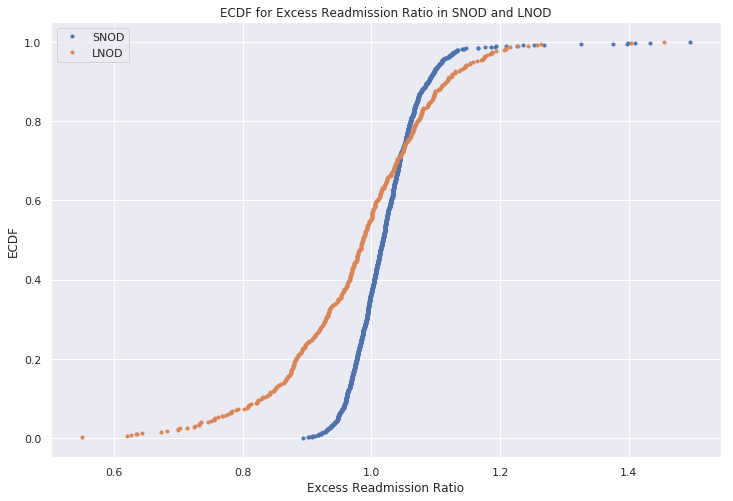

In [25]:
x_snod, y_snod = ecdf(df_snod[excess])
x_lnod, y_lnod = ecdf(df_lnod[excess])

_ = plt.figure(figsize=(12,8))
_ = plt.plot(x_snod, y_snod, marker = ".", linestyle = 'none', label='SNOD')
_ = plt.plot(x_lnod, y_lnod, marker = ".", linestyle = 'none', label='LNOD')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF for Excess Readmission Ratio in SNOD and LNOD')
_ = plt.legend(loc='upper left')

Note the greater variation in LNOD than SNOD.

#### Hypothesis Testing

The analyst's claim is that $\mu_{\text{LNOD}} < \mu_{\text{SNOD}}$. Form and test the hypotheses

$H_0: \mu_{\text{LNOD}} \geq \mu_{\text{SNOD}}$

$H_1: \mu_{\text{LNOD}} < \mu_{\text{SNOD}}$

using frequentist tests at a level of significance $\alpha = 0.01$.

In [26]:
alpha = 0.01

sem_lnod, sem_snod = sigma_lnod / math.sqrt(len(df_lnod)), sigma_snod / math.sqrt(len(df_snod))
sem_dis = math.sqrt(sem_lnod ** 2 + sem_snod ** 2)

z_stat_dis = (mu_lnod - mu_snod) / sem_dis

p_value = stats.norm.sf(abs(z_stat_dis)) # One-tail

print('The z-statistic is %f and the p_value is %f' % (z_stat_dis, p_value))

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The z-statistic is -7.490062 and the p_value is 0.000000
Reject H_0.


The analyst's claim of $\mu_{\text{LNOD}} < \mu_{\text{SNOD}}$ is accurate.

### LNOD500 vs SNOD500

It may also be instructive to take a look at the largest and smallest 500 hospitals, LNOD500 and SNOD500, respectively, in order to compare samples of the same size.

In [27]:
df_mark = df_num[df_num[excess] < 1.6] # Clean off greatest outliers; (mark clusters below)
df_lnod500 = df_mark.nlargest(500, discharges)
df_snod500 = df_mark.nsmallest(500, discharges)

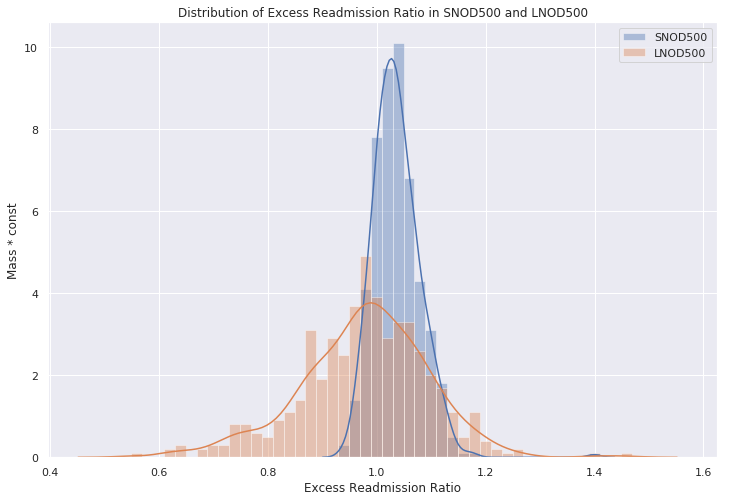

In [28]:
bins_excess = np.arange(df_mark[excess].min(), df_mark[excess].max(), 0.02)
_ = plt.figure(figsize=(12,8))
_ = sns.distplot(df_snod500[excess], bins=bins_excess, label='SNOD500')
_ = sns.distplot(df_lnod500[excess], bins=bins_excess, label='LNOD500')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Mass * const')
_ = plt.title('Distribution of Excess Readmission Ratio in SNOD500 and LNOD500')
_ = plt.legend()
plt.show()

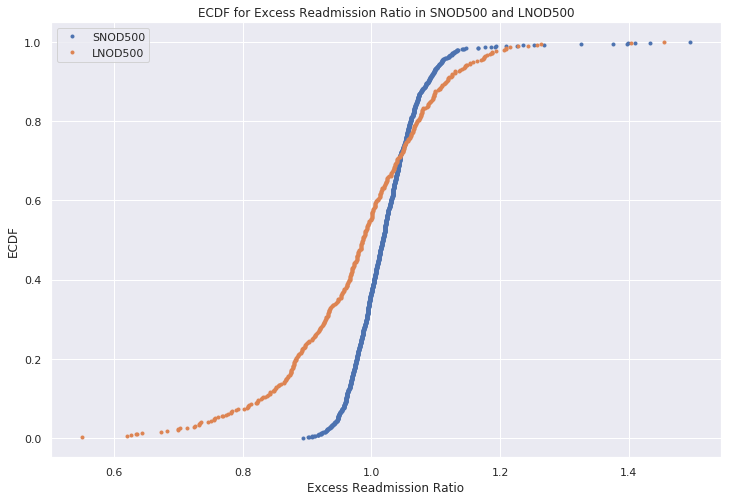

In [29]:
x_snod500, y_snod500 = ecdf(df_snod[excess])
x_lnod500, y_lnod500 = ecdf(df_lnod[excess])

_ = plt.figure(figsize=(12,8))
_ = plt.plot(x_snod500, y_snod500, marker = ".", linestyle = 'none', label='SNOD500')
_ = plt.plot(x_lnod500, y_lnod500, marker = ".", linestyle = 'none', label='LNOD500')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF for Excess Readmission Ratio in SNOD500 and LNOD500')
_ = plt.legend(loc='upper left')

In [30]:
mu_lnod500, mu_snod500 = df_lnod500[excess].mean(), df_snod500[excess].mean()
print('The mean ' + excess + ' for LNOD500 is %.3f.\n' % mu_lnod500 + 
'The mean ' + excess + ' for SNOD500 is %.3f.' %  mu_snod500)

sigma_lnod500, sigma_snod500 = df_lnod500[excess].std(), df_snod500[excess].std()
print('The standard deviation in ' + excess + ' for LNOD500 is %.3f.\n' % sigma_lnod500 + 
'The standard deviation in ' + excess + ' for SNOD500 is %.3f.' %  sigma_snod500)

print('The size of LNOD500 is %i.\n' % len(df_lnod500) + 
'The size of SNOD500 is %i.' %  len(df_snod500))

print('{:.2%} of LNOD500 has an Excess Readmission Ratio > 1.'\
      .format(len(df_lnod500[df_lnod500[excess] > 1]) / len(df_lnod500)))
print('{:.2%} of SNOD500 has an Excess Readmission Ratio > 1.'\
      .format(len(df_snod500[df_snod500[excess] > 1]) / len(df_snod500)))

The mean Excess Readmission Ratio for LNOD500 is 0.978.
The mean Excess Readmission Ratio for SNOD500 is 1.037.
The standard deviation in Excess Readmission Ratio for LNOD500 is 0.118.
The standard deviation in Excess Readmission Ratio for SNOD500 is 0.043.
The size of LNOD500 is 500.
The size of SNOD500 is 500.
43.80% of LNOD500 has an Excess Readmission Ratio > 1.
81.40% of SNOD500 has an Excess Readmission Ratio > 1.


#### Hypothesis Testing

Test $\mu_{\text{LNOD500}} < \mu_{\text{SNOD500}}$. Form and test the hypotheses

$H_0: \mu_{\text{LNOD500}} \geq \mu_{\text{SNOD500}}$

$H_1: \mu_{\text{LNOD500}} < \mu_{\text{SNOD500}}$

using frequentist tests at a level of significance $\alpha = 0.01$.

In [31]:
sem_lnod500, sem_snod500 = sigma_lnod500 / math.sqrt(len(df_lnod500)), sigma_snod500 / math.sqrt(len(df_snod500))
sem_dis500 = math.sqrt(sem_lnod500 ** 2 + sem_snod500 ** 2)

z_stat_dis500 = (mu_lnod500 - mu_snod500) / sem_dis500

p_value = 2 * stats.norm.sf(abs(z_stat_dis500)) # Two-tail

print('The z-statistic is %f and the p_value is %f' % (z_stat_dis500, p_value))

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The z-statistic is -10.488934 and the p_value is 0.000000
Reject H_0.


The discrepencies between SNOD500 and LNOD500 are even greater and more definite than the discrepencies between SNOD and LNOD.

### Clusters: HERR vs LERR; Large vs Small LERR; By Procedure

With a bit more qualitative exploration, two distinct clusters emerge from Expected Readmission Rate; one of the clusters corresponds to a particular procedure (THA/TKA). Examine large (LNOD) vs small (SNOD) facilities which provide THA/TKA. This suggests a further exploration by procedure.

#### Exploration and Existence of Clusters

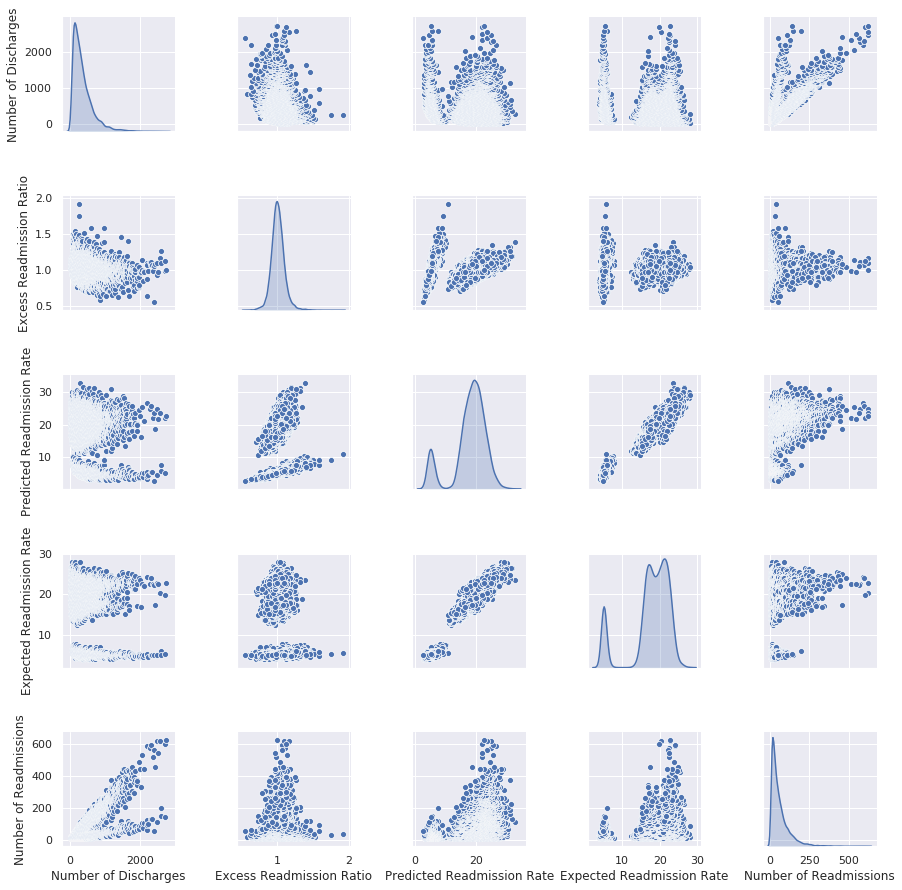

In [32]:
_ = sns.pairplot(df_num, diag_kind="kde")

There are many plots which indicate two distinct clusters, including
1. Excess Readmission Ratio vs Predicted Readmission Rate
2. Excess Readmission Ratio vs Expected Readmission Rate
3. Predicted Readmission Rate vs Expected Readmission Rate
4. The histogram for Expected Readmission Rate
5. Number of Readmission vs Number of Discharges

Since
$$\text{Excess Readmission Ratio} = \frac{\text{Predicted Readmission Rate}}{\text{Expected Readmission Rate}},$$
Excess Readmission Ratio is dependent on Predicted Readmission Rate and Expected Readmission Rate. Further, the latter two are certainly positively correlated. The gap in Expected Readmission Rate near 10 requires explanation.

###### Predicted Readmission Rate vs Expected Readmission Rate

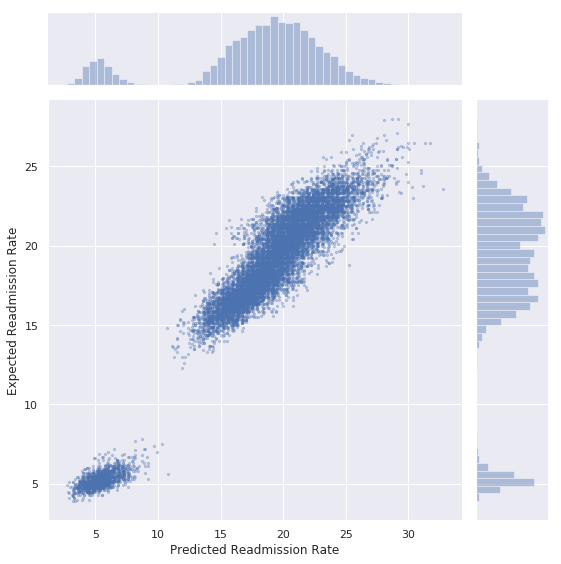

In [33]:
_ = sns.jointplot(x=predicted, y=expected, data=df_num, alpha=0.3, height=8,\
                  joint_kws={"s": 5})

##### The histogram for Expected Readmission Rate

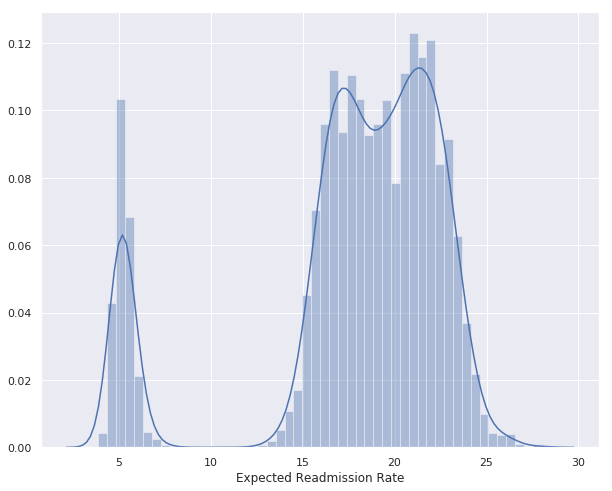

In [34]:
_ = plt.figure(figsize=(10,8))
_ = sns.distplot(df_num[expected])

##### Number of Readmission vs Number of Discharges

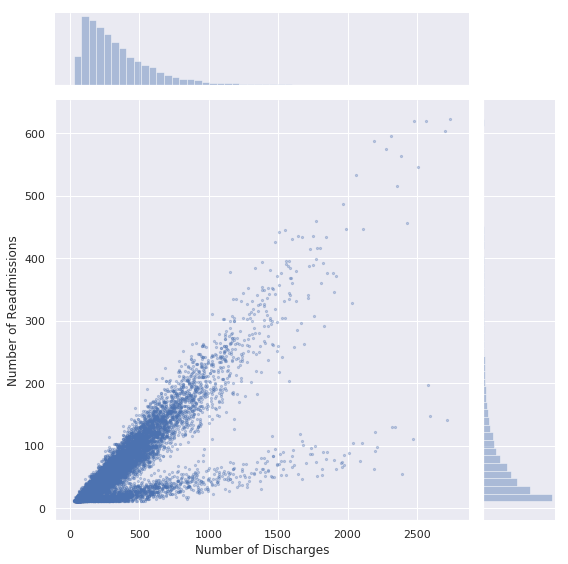

In [35]:
_ = sns.jointplot(x=discharges, y=readmissions, data=df_num, alpha=0.3, height=8,
                 joint_kws={"s": 5})

#### HERR vs LERR: Qualitative

Display the two clusters.

In [36]:
# Define HERR and LERR

#df_mark = df_num[df_num[excess] < 1.6] # Clean off largest two Excess outliers

df_mark = df_num.copy()
df_mark['Cluster'] = ''

condition = df_num[expected] > 10

df_mark.loc[condition, 'Cluster'] = 'HERR'
df_mark.loc[~condition, 'Cluster'] = 'LERR'

df_lerr = df_mark[df_mark['Cluster'] == 'LERR']
df_herr = df_mark[df_mark['Cluster'] == 'HERR']

##### Histogram with KDE of Excess Readmission Ratio for HERR vs LERR

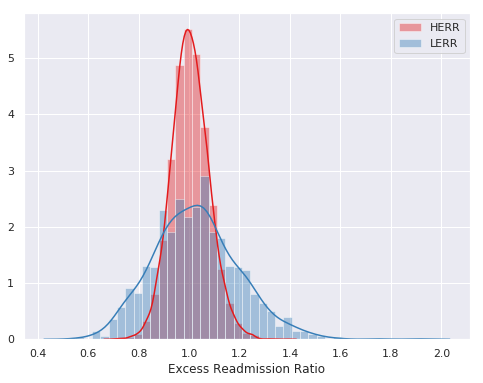

In [37]:
bins_excess = np.arange(df_mark[excess].min(), df_mark[excess].max(), 0.033)
_ = plt.figure(figsize=(8,6))
_ = sns.distplot(df_herr[excess], label='HERR', bins=bins_excess, color=sns.color_palette('Set1')[0])
_ = sns.distplot(df_lerr[excess], label='LERR', bins=bins_excess, color=sns.color_palette('Set1')[1])
_ = plt.legend()
plt.show()

The variation of LERR is considerably greater than the variation of the HERR, despite the fact that HERR has roughly an order of magnitude more facilities in it.

##### Boxen Plot of Excess Readmission Ratio for HERR vs LERR

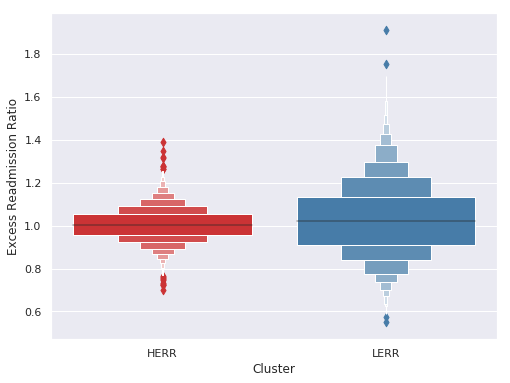

In [38]:
_ = plt.figure(figsize=(8,6))
_ = sns.boxenplot(x='Cluster', y=excess, data=df_mark, palette=sns.color_palette('Set1'))

##### ECDF of HERR vs LERR

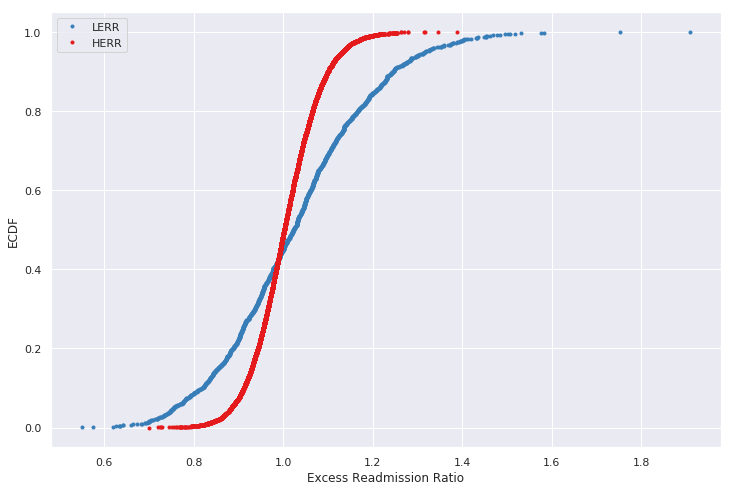

In [39]:
x_low, y_low = ecdf(df_lerr[excess])
x_high, y_high = ecdf(df_herr[excess])

_ = plt.figure(figsize=(12,8))
_ = plt.plot(x_low, y_low, marker = ".", linestyle = 'none', label='LERR', color=sns.color_palette('Set1')[1])
_ = plt.plot(x_high, y_high, marker = ".", linestyle = 'none', label='HERR', color=sns.color_palette('Set1')[0])
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('ECDF')
_ = plt.legend(loc='upper left')

##### Pair Plot of HERR vs LERR

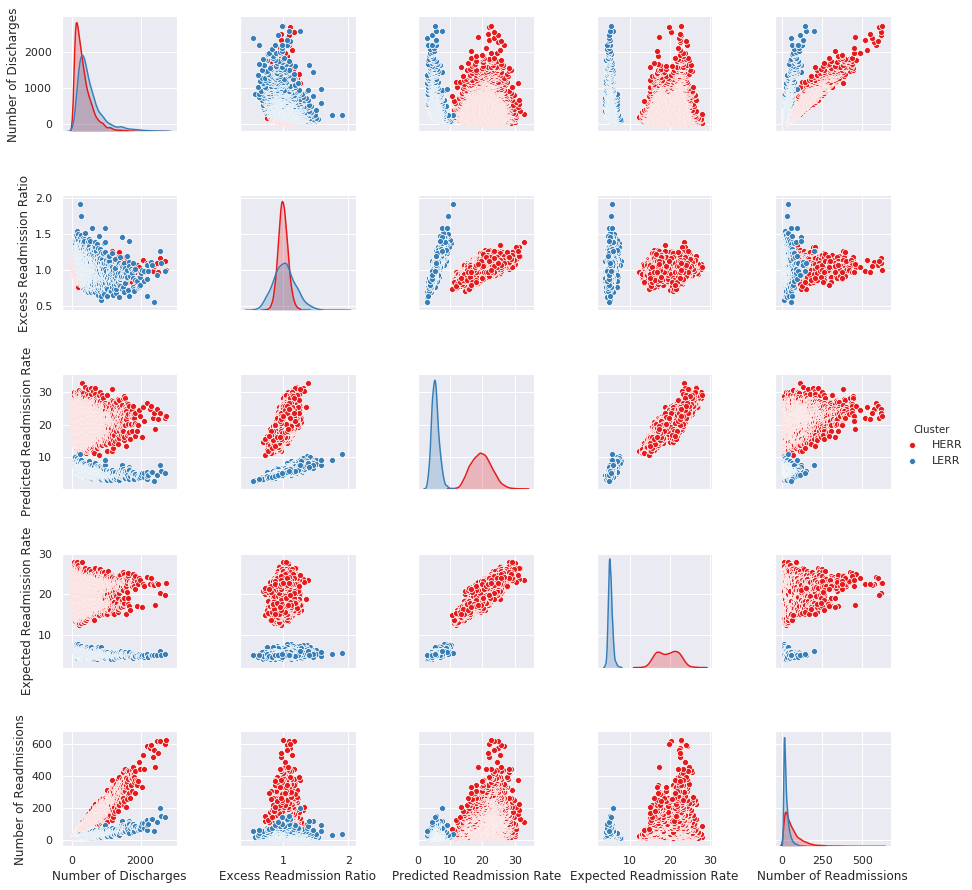

In [40]:
_ = sns.pairplot(df_mark, hue='Cluster', palette=sns.color_palette('Set1'))

##### Number of Readmissions vs Number of Discharges for HERR vs LERR

The clearly different ratio of Number of Readmissions to Number of Discharges for HERR vs LERR is of note. This, in part, explains the existence of the two clusters HERR and LERR. While the author does not know precisely how the Expected Readmission Rate is calculated, it should at least be strongly correlated to the Actual Rate of Readmissions, which we can define as

$$\text{Actual Readmission Rate} = \frac{\text{Number of Readmissions}}{\text{Number of Discharges}}$$

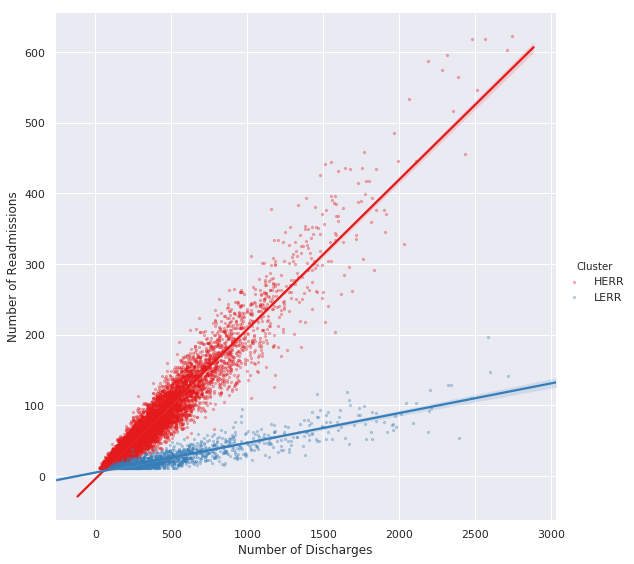

In [41]:
_ = sns.lmplot(x=discharges, y=readmissions, data=df_mark, hue='Cluster', height=8,\
               scatter_kws={"s": 5, "alpha": 0.3}, palette=sns.color_palette('Set1'))

In [42]:
(m, b) = np.polyfit(df_lerr[discharges], df_lerr[readmissions], 1)
print('For LERR, the slope is %.7f and the intercept is %.3f.' % (m,b))

(m, b) = np.polyfit(df_herr[discharges], df_herr[readmissions], 1)
print('For HERR, the slope is %.7f and the intercept is %.3f.' % (m,b))

For LERR, the slope is 0.0420700 and the intercept is 5.077.
For HERR, the slope is 0.2118525 and the intercept is -3.892.


The best fit Actual Readmission Rate for LERR is 4.21 while for HERR it is 21.19. Compare to the values for Predicted and Expected Readmission Rates for LERR (5.44 and 5.27) and for HERR (19.68 and 19.57) computed in the section subsection.

##### Excess Readmission Ratio vs Number of Discharges for LERR and HERR

The difference in correlation and slope of trendline between LERR and HERR are clear. The slope of the trendline for LERR is considerable whereas it is near-zero for HERR.

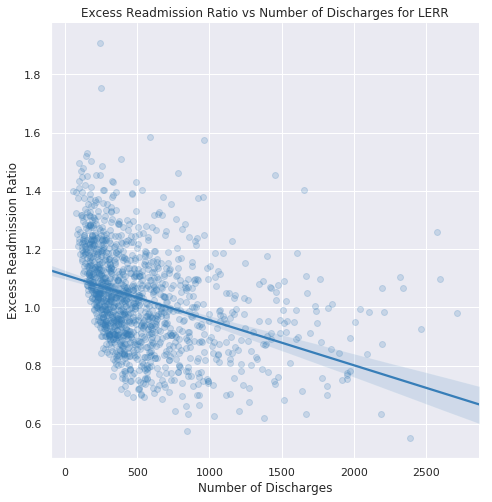

In [43]:
sns.set(style="darkgrid")
_ = sns.lmplot(x=discharges, y=excess, data=df_lerr, hue='Cluster', legend=False,
                height=7, scatter_kws={'alpha':0.2}, palette=sns.color_palette('Set1')[1:]
              )
_ = plt.title('Excess Readmission Ratio vs Number of Discharges for LERR')

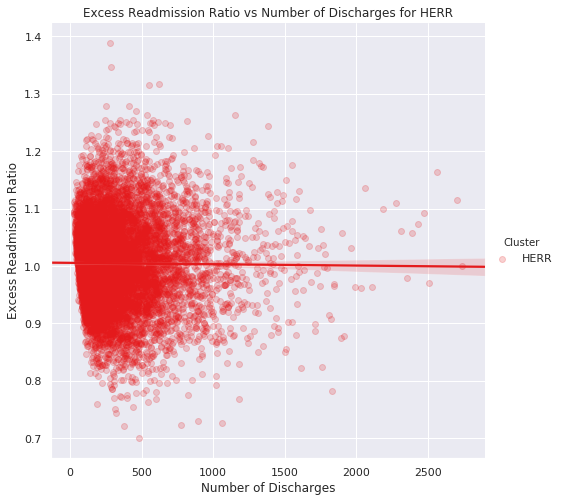

In [44]:
sns.set(style="darkgrid")
_ = sns.lmplot(x=discharges, y=excess, data=df_herr, hue='Cluster',
                height=7, scatter_kws={'alpha':0.2}, palette=sns.color_palette('Set1')
              )
_ = plt.title('Excess Readmission Ratio vs Number of Discharges for HERR')

#### HERR vs LERR: Quantitative

A summary of findings:
* The greatest Expected Readmission Rate in LERR is 7.8 while the least Expected Readmission Rate in HERR is 12.3.
* $n_{\text{LERR}} = 1369, \ n_{\text{HERR}} = 10125$
* The mean Excess Readmission Ratios are: $\mu_{\text{LERR}} = 1.028$ and $\mu_{\text{HERR}} = 1.005$.
* Pearson r for Number of Discharges vs Excess Readmission Ratio within LERR is $r = -0.36$, a much greater effect size.
* Pearson r for Number of Discharges vs Excess Readmission Ratio within HERR is $r = -0.01$, no correlation.
* LERR includes only THA/TKA procedures; HERR includes the four other procedures/conditions: AMI, HF, PN, COPD.
* The slope of the trendline for LERR is -0.0001528. This means that for every increase in facility size by 64 (NoD), the Excess Readmissions Ratio decreases by 0.01.

In [45]:
df_lerr[expected].max()

7.8

In [46]:
df_herr[expected].min()

12.3

##### Basic facts about LERR

In [47]:
df_lerr.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,534.937911,1.028160,5.437911,5.272900,27.581446
std,395.197831,0.169573,1.138835,0.511965,18.775707
min,57.000000,0.549500,2.700000,3.900000,11.000000
25%,274.000000,0.909600,4.600000,4.900000,15.000000
50%,416.000000,1.023300,5.300000,5.200000,21.000000
75%,650.000000,1.133000,6.100000,5.500000,33.000000
max,2716.000000,1.909500,10.800000,7.800000,197.000000


In [48]:
df_lerr.corr()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Number of Discharges,1.000000,-0.360950,-0.398163,-0.251425,0.885505
Excess Readmission Ratio,-0.360950,1.000000,0.885893,0.204347,0.038647
Predicted Readmission Rate,-0.398163,0.885893,1.000000,0.627161,-0.005671
Expected Readmission Rate,-0.251425,0.204347,0.627161,1.000000,-0.074657
Number of Readmissions,0.885505,0.038647,-0.005671,-0.074657,1.000000


In [49]:
df_lerr_enlarge = pd.merge(df_lerr, df_light, how='inner', left_index=True, right_index=True, on=list(cols_num))

df_lerr_enlarge.groupby('Measure Name')[discharges].count()

Measure Name
READM-30-HIP-KNEE-HRRP    1369
Name: Number of Discharges, dtype: int64

In [50]:
df_lerr_enlarge.groupby('Measure Name').mean()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Measure Name,,,,,
READM-30-HIP-KNEE-HRRP,534.937911,1.02816,5.437911,5.2729,27.581446


In [51]:
df_lerr_enlarge.groupby('Measure Name').std()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Measure Name,,,,,
READM-30-HIP-KNEE-HRRP,395.197831,0.169573,1.138835,0.511965,18.775707


##### Basic facts about HERR

In [52]:
df_herr.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,10125.000000,10125.000000,10125.000000,10125.000000,10125.000000
mean,341.243654,1.004753,19.682844,19.570440,68.400889
std,276.203657,0.075095,3.131312,2.601466,60.904369
min,25.000000,0.699700,10.700000,12.300000,11.000000
25%,149.000000,0.955300,17.400000,17.400000,28.000000
50%,264.000000,1.002500,19.600000,19.600000,50.000000
75%,446.000000,1.053000,21.800000,21.700000,88.000000
max,2740.000000,1.389200,32.800000,28.000000,623.000000


In [53]:
df_herr_enlarge = pd.merge(df_herr, df_light, how='inner', left_index=True, right_index=True, on=list(cols_num))

df_herr_enlarge.groupby('Measure Name')[discharges].count()

Measure Name
READM-30-AMI-HRRP     1777
READM-30-COPD-HRRP    2727
READM-30-HF-HRRP      2832
READM-30-PN-HRRP      2789
Name: Number of Discharges, dtype: int64

In [54]:
df_herr_enlarge.groupby('Measure Name').mean()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Measure Name,,,,,
READM-30-AMI-HRRP,267.261114,1.007526,18.068599,17.881767,46.687676
READM-30-COPD-HRRP,329.910524,1.004288,20.364246,20.275028,68.761276
READM-30-HF-HRRP,400.026836,1.003429,22.408898,22.310240,90.472811
READM-30-PN-HRRP,339.773037,1.004785,17.277017,17.175403,59.470778


In [55]:
df_herr_enlarge.groupby('Measure Name').std()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Measure Name,,,,,
READM-30-AMI-HRRP,224.130817,0.075921,2.969115,2.243204,38.565871
READM-30-COPD-HRRP,246.795010,0.066235,2.032944,1.464356,55.812433
READM-30-HF-HRRP,345.087895,0.081258,2.466772,1.311704,80.664798
READM-30-PN-HRRP,239.629354,0.076191,2.077468,1.363659,44.654423


LERR includes only `'Measure Name' == READM-30-HIP-KNEE-HRRP`, which is, [according to the above reference](https://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html) and the Related Link to QualityNet, Elective Primary Total Hip Arthroplasty and/or Total Knee Arthroplasty (THA/TKA). The data suggests a difference in Excess Readmission Ratio between those facilities which perform this procedure and facilities which perform the rest of the procedures.

##### LERR vs HERR Effect Magnitude

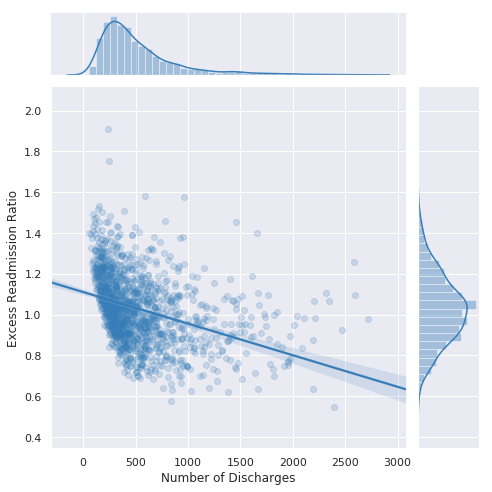

In [56]:
sns.set(style="darkgrid")
_ = sns.jointplot(x=discharges, y=excess, data=df_lerr, kind='reg',
                height=7, scatter_kws={'alpha':0.2}, color=sns.color_palette('Set1')[1])

In [57]:
# Strictly speaking, Number of Discharges is not normal but let's compute r anyway…
(r, p) = stats.pearsonr(df_lerr[discharges], df_lerr[excess])
print('The Pearson correlation coefficient is r = %.2f.\n\
The probability of uncorrelated sets producing an r-value at least as extreme is p = %.5f.' % (r, p))

(m, b) = np.polyfit(df_lerr[discharges], df_lerr[excess], 1)
print('The slope is %.7f and the intercept is %.3f.' % (m,b))

print('Along the line of best fit, an increase by %i in the ' % ((-0.01) / m) + discharges \
      + ' results \nin a decrease in ' + excess + ' of 0.01.' )

The Pearson correlation coefficient is r = -0.36.
The probability of uncorrelated sets producing an r-value at least as extreme is p = 0.00000.
The slope is -0.0001549 and the intercept is 1.111.
Along the line of best fit, an increase by 64 in the Number of Discharges results 
in a decrease in Excess Readmission Ratio of 0.01.


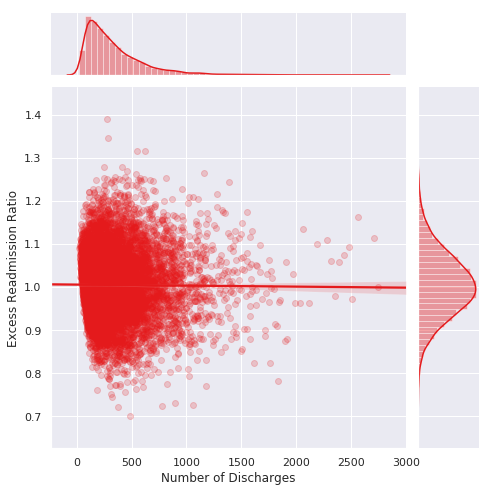

In [58]:
sns.set(style="darkgrid")
_ = sns.jointplot(x=discharges, y=excess, data=df_herr, kind='reg',
                height=7, scatter_kws={'alpha':0.2}, color=sns.color_palette('Set1')[0])

In [59]:
# Strictly speaking, Number of Discharges is not normal but let's compute r anyway…
(r, p) = stats.pearsonr(df_herr[discharges], df_herr[excess])
print('The Pearson correlation coefficient is r = %.2f.\n\
The probability of uncorrelated sets producing an r-value at least as extreme is p = %.5f.' % (r, p))

(m, b) = np.polyfit(df_herr[discharges], df_herr[excess], 1)
print('The slope is %.7f and the intercept is %.3f.' % (m,b))

print('Along the line of best fit, an increase by %i in the ' % ((-0.01) / m) + discharges \
      + ' results \nin a decrease in ' + excess + ' of 0.01.' )

The Pearson correlation coefficient is r = -0.01.
The probability of uncorrelated sets producing an r-value at least as extreme is p = 0.37940.
The slope is -0.0000024 and the intercept is 1.006.
Along the line of best fit, an increase by 4209 in the Number of Discharges results 
in a decrease in Excess Readmission Ratio of 0.01.


#### LERR LNOD vs LERR SNOD

Now compare Large (> 1000 NoD) LERR facilities to Small (< 200 NoD) LERR facilities – there are too few LERR facilities with < 100 NoD for a comparison. The findings are that

* The number of LERR LNOD facilities is $n_{\text{LERR LNOD}} = 141$. The number of LERR SNOD facilities is $\mu_{\text{LERR SNOD}} = 160$.
* The mean Excess Readmission Ratios for LERR LNOD and LERR SNOD are $\mu_{\text{LERR LNOD}} = 0.922$ and $\mu_{\text{LERR SNOD}} = 1.213$. This is a statistically and practically significant difference.
* LERR SNOD facilities have a very high proportion of facilities with Excess Readmission Ratio > 1:
  * 26.95% of LERR LNOD has an Excess Readmission Ratio > 1, while
  * 99.38% of LERR SNOD has an Excess Readmission Ratio > 1.

In [60]:
df_lerr_lnod = df_lerr[df_lerr[discharges] > 1000]
df_lerr_lnod.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,1465.602837,0.922265,4.638298,5.024823,66.510638
std,391.419703,0.153914,0.897589,0.354996,25.850564
min,1004.000000,0.549500,2.700000,4.100000,23.000000
25%,1151.000000,0.822800,4.100000,4.800000,50.000000
50%,1385.000000,0.915100,4.500000,5.000000,62.000000
75%,1669.000000,1.022800,5.200000,5.200000,76.000000
max,2716.000000,1.454300,7.500000,5.900000,197.000000


In [61]:
df_lerr_snod = df_lerr[df_lerr[discharges] < 200]
df_lerr_snod.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,160.000000,160.000000,160.000000,160.000000,160.000000
mean,156.012500,1.213159,6.856875,5.650000,13.962500
std,31.691315,0.114968,0.984255,0.618479,2.632376
min,57.000000,0.993100,5.300000,4.300000,11.000000
25%,134.750000,1.118875,6.000000,5.200000,12.000000
50%,163.500000,1.208150,6.750000,5.500000,13.000000
75%,181.000000,1.282850,7.500000,6.000000,16.000000
max,199.000000,1.530800,10.300000,7.800000,24.000000


In [62]:
mu_lerr_lnod, mu_lerr_snod = df_lerr_lnod[excess].mean(), df_lerr_snod[excess].mean()
print('The mean ' + excess + ' for LERR LNOD is %.3f.\n' % mu_lerr_lnod + 
'The mean ' + excess + ' for LERR SNOD is %.3f.' %  mu_lerr_snod)

sigma_lerr_lnod, sigma_lerr_snod = df_lerr_lnod[excess].std(), df_lerr_snod[excess].std()
print('The standard deviation in ' + excess + ' for LERR LNOD is %.3f.\n' % sigma_lerr_lnod + 
'The standard deviation in ' + excess + ' for LERR SNOD is %.3f.' %  sigma_lerr_snod)

print('The size of LERR LNOD is %i.\n' % len(df_lerr_lnod) + 
'The size of LERR SNOD is %i.' %  len(df_lerr_snod))

print('{:.2%} of LERR LNOD has an Excess Readmission Ratio > 1.'\
      .format(len(df_lerr_lnod[df_lerr_lnod[excess] > 1]) / len(df_lerr_lnod)))
print('{:.2%} of LERR SNOD has an Excess Readmission Ratio > 1.'\
      .format(len(df_lerr_snod[df_lerr_snod[excess] > 1]) / len(df_lerr_snod)))

The mean Excess Readmission Ratio for LERR LNOD is 0.922.
The mean Excess Readmission Ratio for LERR SNOD is 1.213.
The standard deviation in Excess Readmission Ratio for LERR LNOD is 0.154.
The standard deviation in Excess Readmission Ratio for LERR SNOD is 0.115.
The size of LERR LNOD is 141.
The size of LERR SNOD is 160.
26.95% of LERR LNOD has an Excess Readmission Ratio > 1.
99.38% of LERR SNOD has an Excess Readmission Ratio > 1.


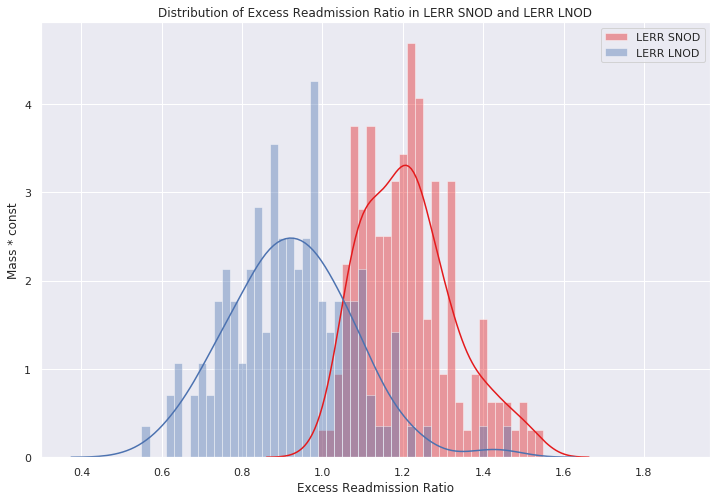

In [63]:
bins_excess = np.arange(df_num[excess].min(), df_num[excess].max(), 0.02)
_ = plt.figure(figsize=(12,8))
_ = sns.distplot(df_lerr_snod[excess], bins=bins_excess, label='LERR SNOD', color=sns.color_palette('Set1')[0])
_ = sns.distplot(df_lerr_lnod[excess], bins=bins_excess, label='LERR LNOD')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Mass * const')
_ = plt.title('Distribution of Excess Readmission Ratio in LERR SNOD and LERR LNOD')
_ = plt.legend()
plt.show()

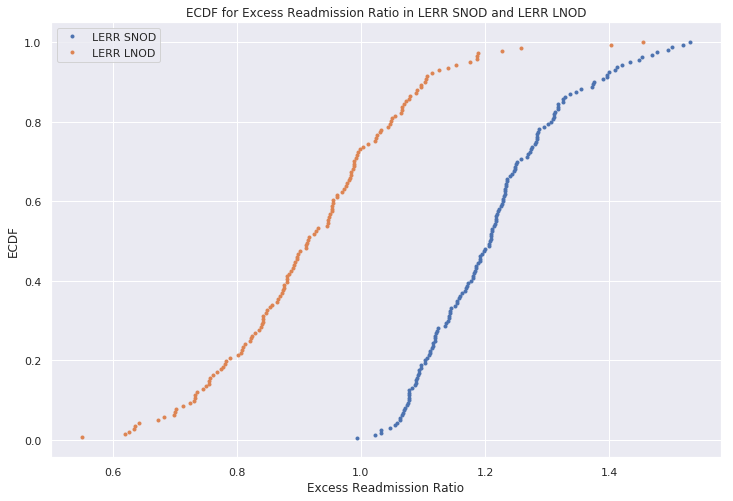

In [64]:
x_lerr_snod, y_lerr_snod = ecdf(df_lerr_snod[excess])
x_lerr_lnod, y_lerr_lnod = ecdf(df_lerr_lnod[excess])

_ = plt.figure(figsize=(12,8))
_ = plt.plot(x_lerr_snod, y_lerr_snod, marker = ".", linestyle = 'none', label='LERR SNOD')
_ = plt.plot(x_lerr_lnod, y_lerr_lnod, marker = ".", linestyle = 'none', label='LERR LNOD')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF for Excess Readmission Ratio in LERR SNOD and LERR LNOD')
_ = plt.legend(loc='upper left')

The difference in means between LERR LNOD and LERR SNOD is unmistakable (but still subject to hypothesis testing).

##### Hypothesis Testing

Claim is that $\mu_{\text{LERR LNOD}} < \mu_{\text{LERR SNOD}}$. Form and test the hypotheses

$H_0: \mu_{\text{LERR LNOD}} \geq \mu_{\text{LERR SNOD}}$

$H_1: \mu_{\text{LERR LNOD}} < \mu_{\text{LERR SNOD}}$

using frequentist tests at a level of significance $\alpha = 0.01$.

In [65]:
alpha = 0.01

sem_lerr_lnod = sigma_lerr_lnod / math.sqrt(len(df_lerr_lnod))
sem_lerr_snod = sigma_lerr_snod / math.sqrt(len(df_lerr_snod))
sem_dis = math.sqrt(sem_lerr_lnod ** 2 + sem_lerr_snod ** 2)

z_stat_dis = (mu_lerr_lnod - mu_lerr_snod) / sem_dis

p_value = stats.norm.sf(abs(z_stat_dis)) # One-tail

print('The z-statistic is %f and the p_value is %f' % (z_stat_dis, p_value))

if p_value > alpha:
    print('Fail to reject H_0.')
else:
    print('Reject H_0.')

The z-statistic is -18.374963 and the p_value is 0.000000
Reject H_0.


We adopt $\mu_{\text{LERR LNOD}} < \mu_{\text{LERR SNOD}}$.

#### Further Exploration by Procedure/Condition

Use the colors for the chart in the [B. Statistics](#B.-Statistics) section for the colors of each Measure Name/Condition (rather than the coloring of HERR and LERR).

In [66]:
measure_colors = {measures[n]: sns.color_palette()[n] for n in range(len(measures))}

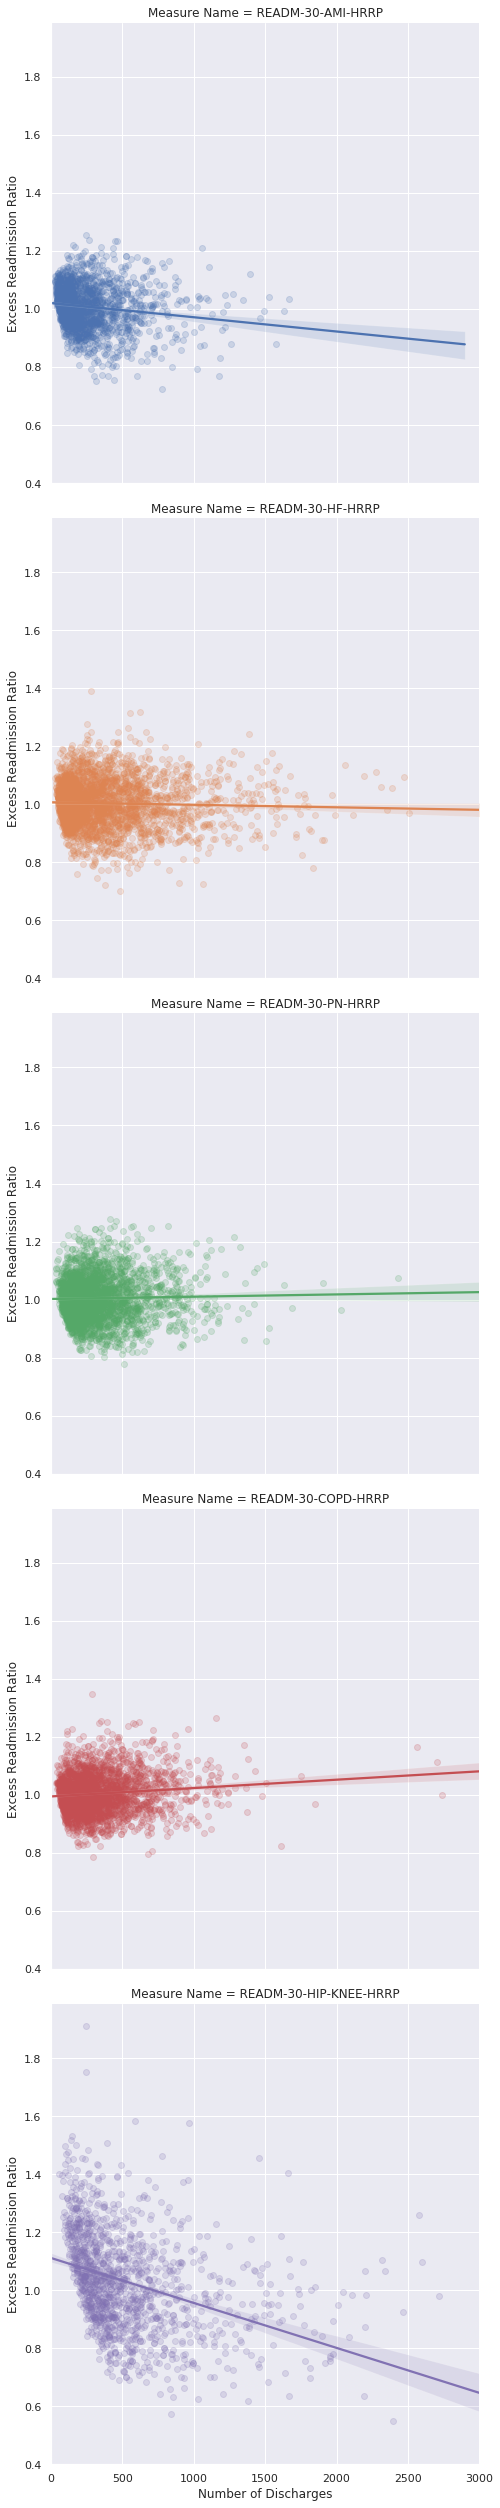

In [67]:
sns.set(style="darkgrid")
_ = sns.lmplot(x=discharges, y=excess, data=df_light, hue='Measure Name', row='Measure Name',
               height=7, scatter_kws={'alpha':0.2}, palette=measure_colors)
_= plt.xlim(0, 3000)

Visually, while HIP-KNEE (THA/TKA) has the slope of greatest magnitude, we may want to examine COPD and AMI quantitatively as well.

In [68]:
for i in range(len(measures)):
    (r, p) = stats.pearsonr(df_light[df_light['Measure Name'] == measures[i]][discharges],\
                        df_light[df_light['Measure Name'] == measures[i]][excess])
    print('The Pearson correlation coefficient is r = %.2f.\n\
The probability of uncorrelated sets producing an r-value at least as extreme is p = %.5f.' % (r, p))
    (m, b) = np.polyfit(df_light[df_light['Measure Name'] == measures[i]][discharges],\
                        df_light[df_light['Measure Name'] == measures[i]][excess], 1)
    print('For ' + measures[i] + ':')
    print('The slope is %.7f and the intercept is %.3f.' % (m,b))
    print('Along the line of best fit, an increase by %i in the ' % ((-0.01) / m) + discharges \
      + ' results \nin a decrease in ' + excess + ' of 0.01.\n' )

The Pearson correlation coefficient is r = -0.15.
The probability of uncorrelated sets producing an r-value at least as extreme is p = 0.00000.
For READM-30-AMI-HRRP:
The slope is -0.0000492 and the intercept is 1.021.
Along the line of best fit, an increase by 203 in the Number of Discharges results 
in a decrease in Excess Readmission Ratio of 0.01.

The Pearson correlation coefficient is r = -0.04.
The probability of uncorrelated sets producing an r-value at least as extreme is p = 0.05021.
For READM-30-HF-HRRP:
The slope is -0.0000087 and the intercept is 1.007.
Along the line of best fit, an increase by 1154 in the Number of Discharges results 
in a decrease in Excess Readmission Ratio of 0.01.

The Pearson correlation coefficient is r = 0.02.
The probability of uncorrelated sets producing an r-value at least as extreme is p = 0.19153.
For READM-30-PN-HRRP:
The slope is 0.0000079 and the intercept is 1.002.
Along the line of best fit, an increase by -1271 in the Number of Discharg

Facility size may have practical significance for facilities treating AMI and COPD ($r = -0.15$ and $r = 0.11$) as well:
* For AMI, an increase in NoD by 203 results in a decrease of 0.01 in Excess Readmission Ratio.
* For COPD, a *decrease* in NoD by 347 results in a decrease of 0.01 in Excess Readmission Ratio.

#### A Brief Exploration of High vs Low Excess Readmission Ratio Facilities

Examine the 500 facilities with the greatest Excess Readmission Ratios and least Excess Readmission Ratios.
* Of the 500 facilities with the greatest Excess Readmission Ratios, 275 (55%) are THA/TKA facilities (LERR) and other 225 (45%) treat the other conditions (HERR).
* Of the 500 facilities with the least Excess Readmission Ratios, 222 (44.4%) are THA/TKA facilities (LERR) and other 278 (55.6%) treat the other conditions (HERR).

In [69]:
df_higher = df_mark.sort_values(by=excess).tail(500)

In [70]:
df_higher.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,380.880000,1.241502,14.621200,11.988600,66.754000
std,288.145751,0.085329,8.796387,7.464221,66.426308
min,56.000000,1.165600,5.200000,4.300000,11.000000
25%,186.750000,1.184675,6.700000,5.300000,20.000000
50%,295.000000,1.214750,8.100000,6.100000,41.000000
75%,472.500000,1.263525,23.325000,19.400000,93.000000
max,2581.000000,1.909500,32.800000,26.500000,445.000000


In [71]:
df_lower = df_mark.sort_values(by=excess).head(500)

In [72]:
df_lower.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,599.452000,0.811874,10.57560,12.823400,46.208000
std,388.370027,0.052426,6.12921,7.190502,41.439682
min,111.000000,0.549500,2.70000,3.900000,11.000000
25%,353.000000,0.786200,4.10000,5.100000,19.000000
50%,484.000000,0.830350,12.80000,15.300000,34.000000
75%,722.250000,0.849325,16.30000,20.300000,58.250000
max,2393.000000,0.865600,20.80000,24.000000,307.000000


In [73]:
df_higher['Cluster'].value_counts()

LERR    275
HERR    225
Name: Cluster, dtype: int64

In [74]:
df_lower['Cluster'].value_counts()

HERR    278
LERR    222
Name: Cluster, dtype: int64

##### Pair Plot of HERR vs LERR for 500 Facilities with Greatest Excess Readmission Ratio

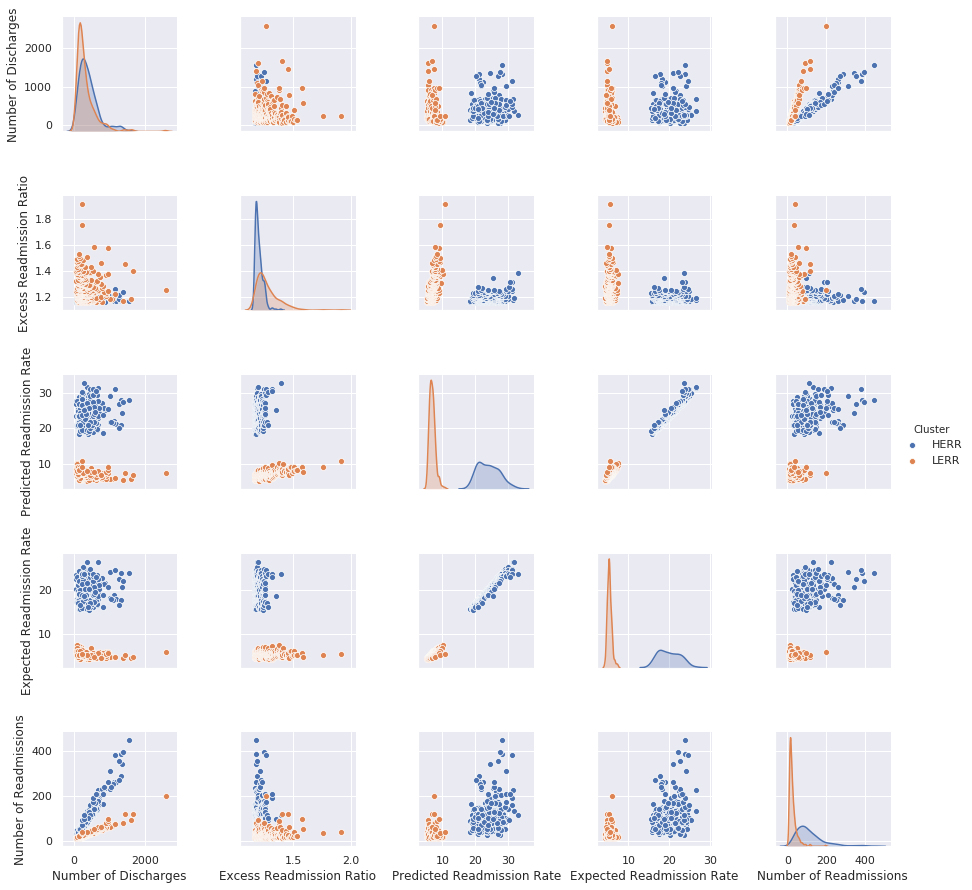

In [75]:
_ = sns.pairplot(df_higher, diag_kind='kde', hue='Cluster')

##### Pair Plot of HERR vs LERR for 500 Facilities with Least Excess Readmission Ratio

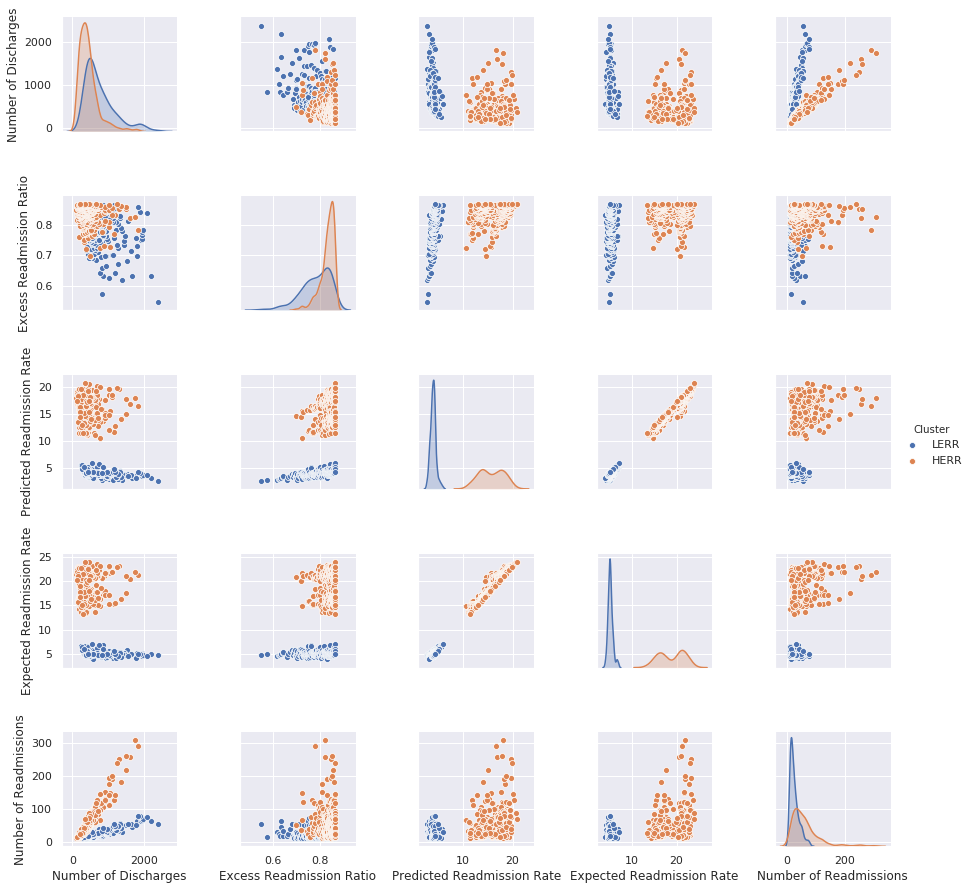

In [76]:
_ = sns.pairplot(df_lower, diag_kind='kde', hue='Cluster')

Further analysis of greatest vs least Excess Readmission Ratio, including by procedure cluster, would be reasonable.

### Excess Readmission Ratio by State

In [77]:
state_excess = df_light.groupby('State')[excess].mean().sort_values()

state_geo = os.path.join('data', 'us-states.json') # JSON from folium examples

m = folium.Map(location=[39, -97], zoom_start=4)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_excess,
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Excess Readmission Ratio (%)'
)
m

/Users/i/anaconda3/lib/python3.7/site-packages/folium/folium.py:432: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


There is possible variation by state. This is worthy of further examination, especially by procedure cluster.